<a href="https://colab.research.google.com/github/janibert1/2dewebsite/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  2 of 2 completed


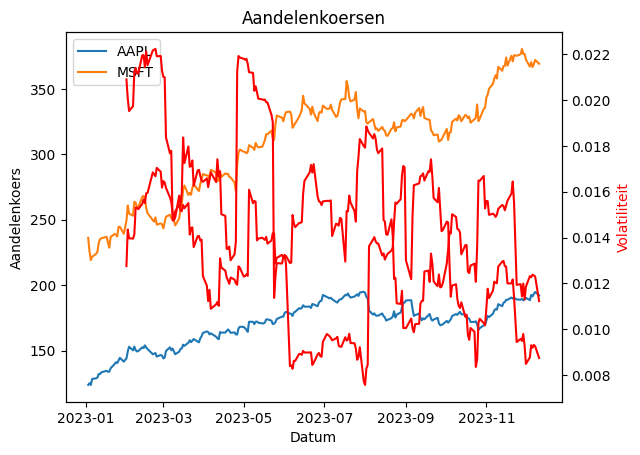

In [7]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import matplotlib.pyplot as plt

def aandelen_grafiek(bedrijven, startdatum, einddatum, volatiliteit=False):
  """
  Plot de aandelenkoersen en optioneel de volatiliteit van de gegeven bedrijven.

  Args:
    bedrijven: Een lijst met bedrijfsnamen of beursnamen.
    startdatum: De startdatum voor de data.
    einddatum: De einddatum voor de data.
    volatiliteit: Een boolean die aangeeft of de volatiliteit grafiek moet worden geplot.
  """

  # Data ophalen
  data = yf.download(bedrijven, start=startdatum, end=einddatum)['Close']


  # Aandelenkoersen plotten
  fig, ax1 = plt.subplots()
  ax1.plot(data)
  ax1.set_xlabel('Datum')
  ax1.set_ylabel('Aandelenkoers')
  ax1.legend(data.columns)

  # Volatiliteit plotten (optioneel)
  if volatiliteit:
    ax2 = ax1.twinx()
    ax2.plot(data.pct_change().rolling(window=20).std(), color='red')
    ax2.set_ylabel('Volatiliteit', color='red')

  plt.title('Aandelenkoersen')
  plt.show()

# Voorbeeld gebruik


bedrijven = ['AAPL', 'MSFT']  # Of ['AAPL', 'MSFT']
startdatum = '2023-01-01'
einddatum = '2023-12-12'

aandelen_grafiek(bedrijven, startdatum, einddatum, volatiliteit=True)

[*********************100%***********************]  2 of 2 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APPL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 -> 2023-12-12)')


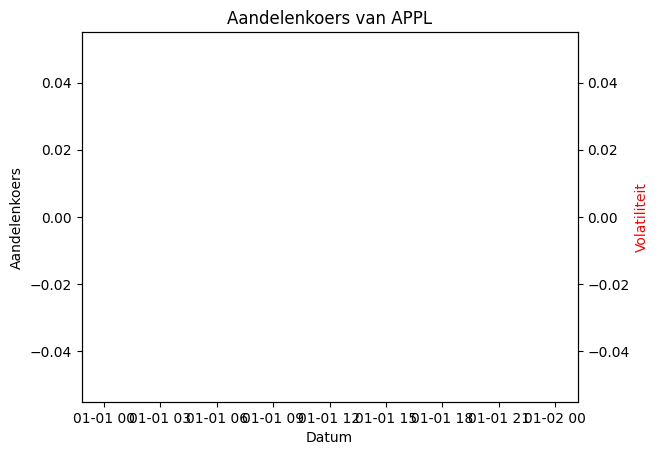

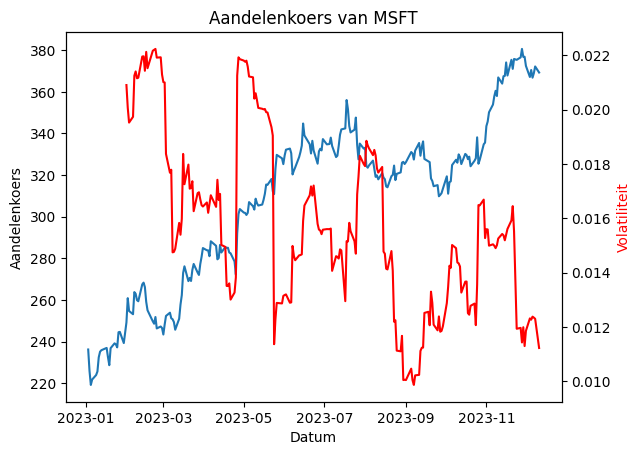

In [12]:

import yfinance as yf
import matplotlib.pyplot as plt

def aandelen_grafiek(bedrijven, startdatum, einddatum, volatiliteit=False):
  """
  Plot de aandelenkoersen en optioneel de volatiliteit van de gegeven bedrijven
  in afzonderlijke grafieken.

  Args:
    bedrijven: Een lijst met bedrijfsnamen of beursnamen.
    startdatum: De startdatum voor de data.
    einddatum: De einddatum voor de data.
    volatiliteit: Een boolean die aangeeft of de volatiliteit grafiek
                 moet worden geplot.
  """

  # Data ophalen
  data = yf.download(bedrijven, start=startdatum, end=einddatum)

  # Voor elk bedrijf een aparte grafiek maken
  for bedrijf in bedrijven:
    # Data voor het huidige bedrijf selecteren
    bedrijf_data = data['Close'][bedrijf]

    # Figuur en assen aanmaken
    fig, ax1 = plt.subplots()

    # Aandelenkoersen plotten
    ax1.plot(bedrijf_data)
    ax1.set_xlabel('Datum')
    ax1.set_ylabel('Aandelenkoers')
    ax1.set_title(f'Aandelenkoers van {bedrijf}')

    # Volatiliteit plotten (optioneel)
    if volatiliteit:
      ax2 = ax1.twinx()
      ax2.plot(bedrijf_data.pct_change(fill_method=None).rolling(window=20).std(), color='red')  # Aangepast
      ax2.set_ylabel('Volatiliteit', color='red')

    plt.show()

# Voorbeeld gebruik
bedrijven = ['APPL', 'MSFT']  # Of ['AAPL', 'MSFT']
startdatum = '2023-01-01'
einddatum = '2023-12-12'

aandelen_grafiek(bedrijven, startdatum, einddatum, volatiliteit=True)